In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [101]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [89]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [90]:
len(dataset)

10000

Exited (Churned)
1 --> Yes
0 --> No

In [91]:
#Check any missing data
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Exploratory Data Analysis

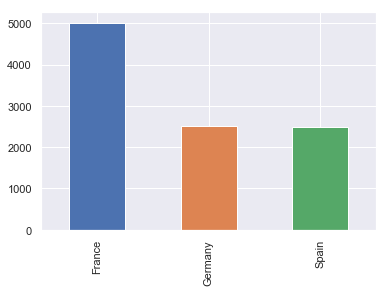

In [92]:
#Geography
dataset['Geography'].value_counts().plot.bar()

In [93]:
dataset.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

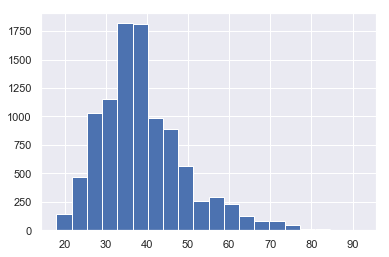

In [94]:
dataset['Age'].hist(bins = 20)

In [102]:
dataset['Age'] = dataset['Age'].apply(lambda x : 0 if x >=20 and x < 30 else 1 if x >=30 and x < 40 else 2 if x >=40 and x < 50 else 3)

In [104]:
dataset['Age'].value_counts()

1    4346
2    2618
0    1592
3    1444
Name: Age, dtype: int64

In [105]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,2,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,2,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,2,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,1,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,2,2,125510.82,1,1,1,79084.10,0


In [106]:
dataset_X = dataset.iloc[:,3:13]

In [107]:
dataset_y = dataset.iloc[:,-1]

In [108]:
dataset_X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,2,2,0.00,1,1,1,101348.88
1,608,Spain,Female,2,1,83807.86,1,0,1,112542.58
2,502,France,Female,2,8,159660.80,3,1,0,113931.57
3,699,France,Female,1,1,0.00,2,0,0,93826.63
4,850,Spain,Female,2,2,125510.82,1,1,1,79084.10


In [109]:
dataset_y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Data Preprocessing

In [111]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [112]:
dataset_X['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [113]:
enc_geo = LabelEncoder()
dataset_X['Geography'] = enc_geo.fit_transform(dataset_X['Geography'])

In [115]:
#0 : France,1: Germany, 2: Spain
dataset_X['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [116]:
dataset_X['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [117]:
enc_gen = LabelEncoder()
dataset_X['Gender'] = enc_gen.fit_transform(dataset_X['Gender'])

In [118]:
dataset_X['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [119]:
dataset_X.head()

np.array([[600,0,0,1,0,1,0,2,60000,1,1,1,50000]])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,2,2,0.00,1,1,1,101348.88
1,608,2,0,2,1,83807.86,1,0,1,112542.58
2,502,0,0,2,8,159660.80,3,1,0,113931.57
3,699,0,0,1,1,0.00,2,0,0,93826.63
4,850,2,0,2,2,125510.82,1,1,1,79084.10


In [120]:
dataset_X = dataset_X.values

In [122]:
geo_ohe = OneHotEncoder(categorical_features=[1])

In [123]:
dataset_X = geo_ohe.fit_transform(dataset_X).toarray()

In [128]:
dataset_X = dataset_X[:,1:]

In [134]:
age_ohe = OneHotEncoder(categorical_features=[4])

In [135]:
dataset_X = age_ohe.fit_transform(dataset_X).toarray()

In [137]:
dataset_X = dataset_X[:,1:]

In [138]:
dataset_y = dataset_y.values

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train,X_test,y_train,y_test = train_test_split(dataset_X,dataset_y,test_size = 0.2,random_state = 0)

In [142]:
X_train.shape

(8000, 13)

In [143]:
X_test.shape

(2000, 13)

In [144]:
y_train.shape

(8000,)

In [145]:
y_test.shape

(2000,)

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
sc_X = StandardScaler()

In [148]:
X_train = sc_X.fit_transform(X_train)

In [149]:
X_test = sc_X.transform(X_test)

## Building ANN Model

In [210]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [211]:
X_train.shape

(8000, 13)

In [238]:
model = Sequential()

In [239]:
model.add(Dense(units=10, activation= 'relu',kernel_initializer='uniform',input_dim = 13))

In [240]:
model.add(Dense(units=10, activation= 'relu',kernel_initializer='uniform'))

In [241]:
#model.add(Dense(units=10, activation= 'relu',kernel_initializer='uniform'))

In [242]:
model.add(Dense(units=1, activation= 'sigmoid',kernel_initializer='uniform'))

In [243]:
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [244]:
model.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
8000/8000 [==============================] - 2s 285us/step - loss: 0.4833 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 1s 173us/step - loss: 0.4318 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 177us/step - loss: 0.4267 - acc: 0.8010
Epoch 4/100
8000/8000 [==============================] - 1s 170us/step - loss: 0.4229 - acc: 0.8186
Epoch 5/100
8000/8000 [==============================] - 1s 174us/step - loss: 0.4208 - acc: 0.8220
Epoch 6/100
8000/8000 [==============================] - 1s 177us/step - loss: 0.4190 - acc: 0.8236
Epoch 7/100
8000/8000 [==============================] - 2s 191us/step - loss: 0.4174 - acc: 0.8251
Epoch 8/100
8000/8000 [==============================] - 1s 176us/step - loss: 0.4156 - acc: 0.8262
Epoch 9/100
8000/8000 [==============================] - 1s 176us/step - loss: 0.4145 - acc: 0.8267
Epoch 10/100
8000/8000 [==============================] - 1s 177us/step - loss: 0.4137 - acc: 0.8266

8000/8000 [==============================] - 1s 178us/step - loss: 0.3516 - acc: 0.8550
Epoch 83/100
8000/8000 [==============================] - 2s 189us/step - loss: 0.3488 - acc: 0.8565
Epoch 84/100
8000/8000 [==============================] - 1s 176us/step - loss: 0.3475 - acc: 0.8557
Epoch 85/100
8000/8000 [==============================] - 1s 174us/step - loss: 0.3473 - acc: 0.8575
Epoch 86/100
8000/8000 [==============================] - 1s 176us/step - loss: 0.3459 - acc: 0.8542
Epoch 87/100
8000/8000 [==============================] - 1s 175us/step - loss: 0.3441 - acc: 0.8571
Epoch 88/100
8000/8000 [==============================] - 1s 175us/step - loss: 0.3435 - acc: 0.8575
Epoch 89/100
8000/8000 [==============================] - 1s 175us/step - loss: 0.3420 - acc: 0.8597
Epoch 90/100
8000/8000 [==============================] - 1s 180us/step - loss: 0.3418 - acc: 0.8611
Epoch 91/100
8000/8000 [==============================] - 1s 176us/step - loss: 0.3417 - acc: 0.8621
Epo

In [245]:
y_pred = model.predict(X_test)

In [246]:
y_pred = (y_pred > 0.5)

In [247]:
from sklearn.metrics import confusion_matrix

In [248]:
cm = confusion_matrix(y_test,y_pred)

In [249]:
cm

array([[1498,   97],
       [ 184,  221]])

In [250]:
accuracy = (cm[0][0]+cm[1][1])/X_test.shape[0]

In [251]:
accuracy

0.8595

In [188]:
#Evaluating ANN

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [198]:
def build_classifier():
    model = Sequential()
    model.add(Dense(units=8, activation= 'relu',kernel_initializer='uniform',input_dim = 13))
    model.add(Dense(units=8, activation= 'relu',kernel_initializer='uniform'))
    model.add(Dense(units=1, activation= 'sigmoid',kernel_initializer='uniform'))
    model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    return model    

In [200]:
model = KerasClassifier(build_fn=build_classifier, batch_size = 10, epochs = 10)
accuracies = cross_val_score(estimator=model,X = X_train,y = y_train,cv = 10)

Epoch 1/10
7200/7200 [==============================] - 2s 263us/step - loss: 0.4845 - acc: 0.7967 0s - loss: 0.5150 -
Epoch 2/10
7200/7200 [==============================] - 1s 182us/step - loss: 0.4289 - acc: 0.7971
Epoch 3/10
7200/7200 [==============================] - 1s 177us/step - loss: 0.4240 - acc: 0.8024
Epoch 4/10
7200/7200 [==============================] - 2s 302us/step - loss: 0.4205 - acc: 0.8214
Epoch 5/10
7200/7200 [==============================] - 2s 218us/step - loss: 0.4172 - acc: 0.8247
Epoch 6/10
7200/7200 [==============================] - 1s 174us/step - loss: 0.4148 - acc: 0.8257
Epoch 7/10
7200/7200 [==============================] - 1s 165us/step - loss: 0.4136 - acc: 0.8262
Epoch 8/10
7200/7200 [==============================] - 1s 164us/step - loss: 0.4123 - acc: 0.8261
Epoch 9/10
7200/7200 [==============================] - 1s 175us/step - loss: 0.4111 - acc: 0.8258
Epoch 10/10
800/800 [==============================] - 0s 152us/step
Epoch 1/10
7200/7200

7200/7200 [==============================] - 1s 186us/step - loss: 0.3698 - acc: 0.8475 0s - loss: 0.3683 - acc: 
Epoch 10/10
800/800 [==============================] - 0s 327us/step
Epoch 1/10
7200/7200 [==============================] - 2s 287us/step - loss: 0.4771 - acc: 0.8028
Epoch 2/10
7200/7200 [==============================] - 1s 177us/step - loss: 0.4174 - acc: 0.8225
Epoch 3/10
7200/7200 [==============================] - 1s 176us/step - loss: 0.4119 - acc: 0.8274
Epoch 4/10
7200/7200 [==============================] - 1s 176us/step - loss: 0.4086 - acc: 0.8292
Epoch 5/10
7200/7200 [==============================] - 1s 174us/step - loss: 0.4075 - acc: 0.8296
Epoch 6/10
7200/7200 [==============================] - 1s 176us/step - loss: 0.4069 - acc: 0.8279
Epoch 7/10
7200/7200 [==============================] - 1s 174us/step - loss: 0.4063 - acc: 0.8290
Epoch 8/10
7200/7200 [==============================] - 1s 172us/step - loss: 0.4058 - acc: 0.8289
Epoch 9/10
7200/7200 [===

In [202]:
accuracies.mean()

0.8289999949932099

In [203]:
accuracies.std()

0.01295183260616807

In [204]:
X_train[0]

array([ 1.14054112, -0.59505978, -0.40765274, -0.5698444 ,  1.74309049,
        0.16958176, -1.09168714,  0.00666099, -1.21571749,  0.8095029 ,
        0.64259497, -1.03227043,  1.10643166])

In [233]:
#Test Whether a customer leaves the bank or not

test = sc_X.transform(np.array([[0,0,0,1,0,600,1,3,60000,2,1,1,50000]]))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [234]:
test

array([[-0.8767768 , -0.59505978, -0.40765274,  1.75486502, -0.57369368,
        -0.52111599,  0.91601335, -0.68538967, -0.2569057 ,  0.8095029 ,
         0.64259497,  0.9687384 , -0.87203322]])

In [235]:
test_pred = model.predict(test)

In [236]:
#the model predicts that the customer wont leave the bank.

np.int(test_pred[0][0])

0